<h1><center>Analysis of Onion Market Dynamics</center></h1>
<p><center>By Amaan Makandar and Keith Lee</center><p>
<hr>

# Introduction

text


# Data Collection

<b>Imports</b>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [38]:
global_df = pd.read_csv('onion_timeseries_data.csv')

# Display the first few rows of the DataFrame
print(global_df.head(), '\n')

# Check the data types of each column
print(global_df.dtypes)

  Commodity        Date  Arrivals in Qtls.   Min   Max  Modal
0     ONION   5/12/2015             158796   439  1538   1046
1     ONION    8/2/2015              37413  1789  3808   3054
2     ONION  10/23/2015              45384  1122  3035   2273
3     ONION   1/13/2016             271679   547  1468   1147
4     ONION   3/10/2016             261306   408   871    704 

Commodity            object
Date                 object
Arrivals in Qtls.     int64
Min                   int64
Max                   int64
Modal                 int64
dtype: object


# Data Processing

In [39]:
# Commodity column is not needed, it is always Onion
df = global_df.drop(columns=['Commodity'])

# Update column names for ease of use
df.columns = ['date', 'quantity', 'min', 'max', 'modal']

# Segmenting date to hold data >= 2017
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2017-01-01']
df = df.sort_values(by='date')

# Add a column for the day of the week and month
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Set date to index
df.set_index('date', inplace=True)

print(df.head())

            quantity  min  max  modal  day_of_week  month
date                                                     
2017-01-01     66628  388  912    725            6      1
2017-01-02    404637  339  874    680            0      1
2017-01-03    374566  353  891    681            1      1
2017-01-04    427267  342  838    671            2      1
2017-01-05    423237  342  855    669            3      1


# Exploratory Analysis & Data Visualization

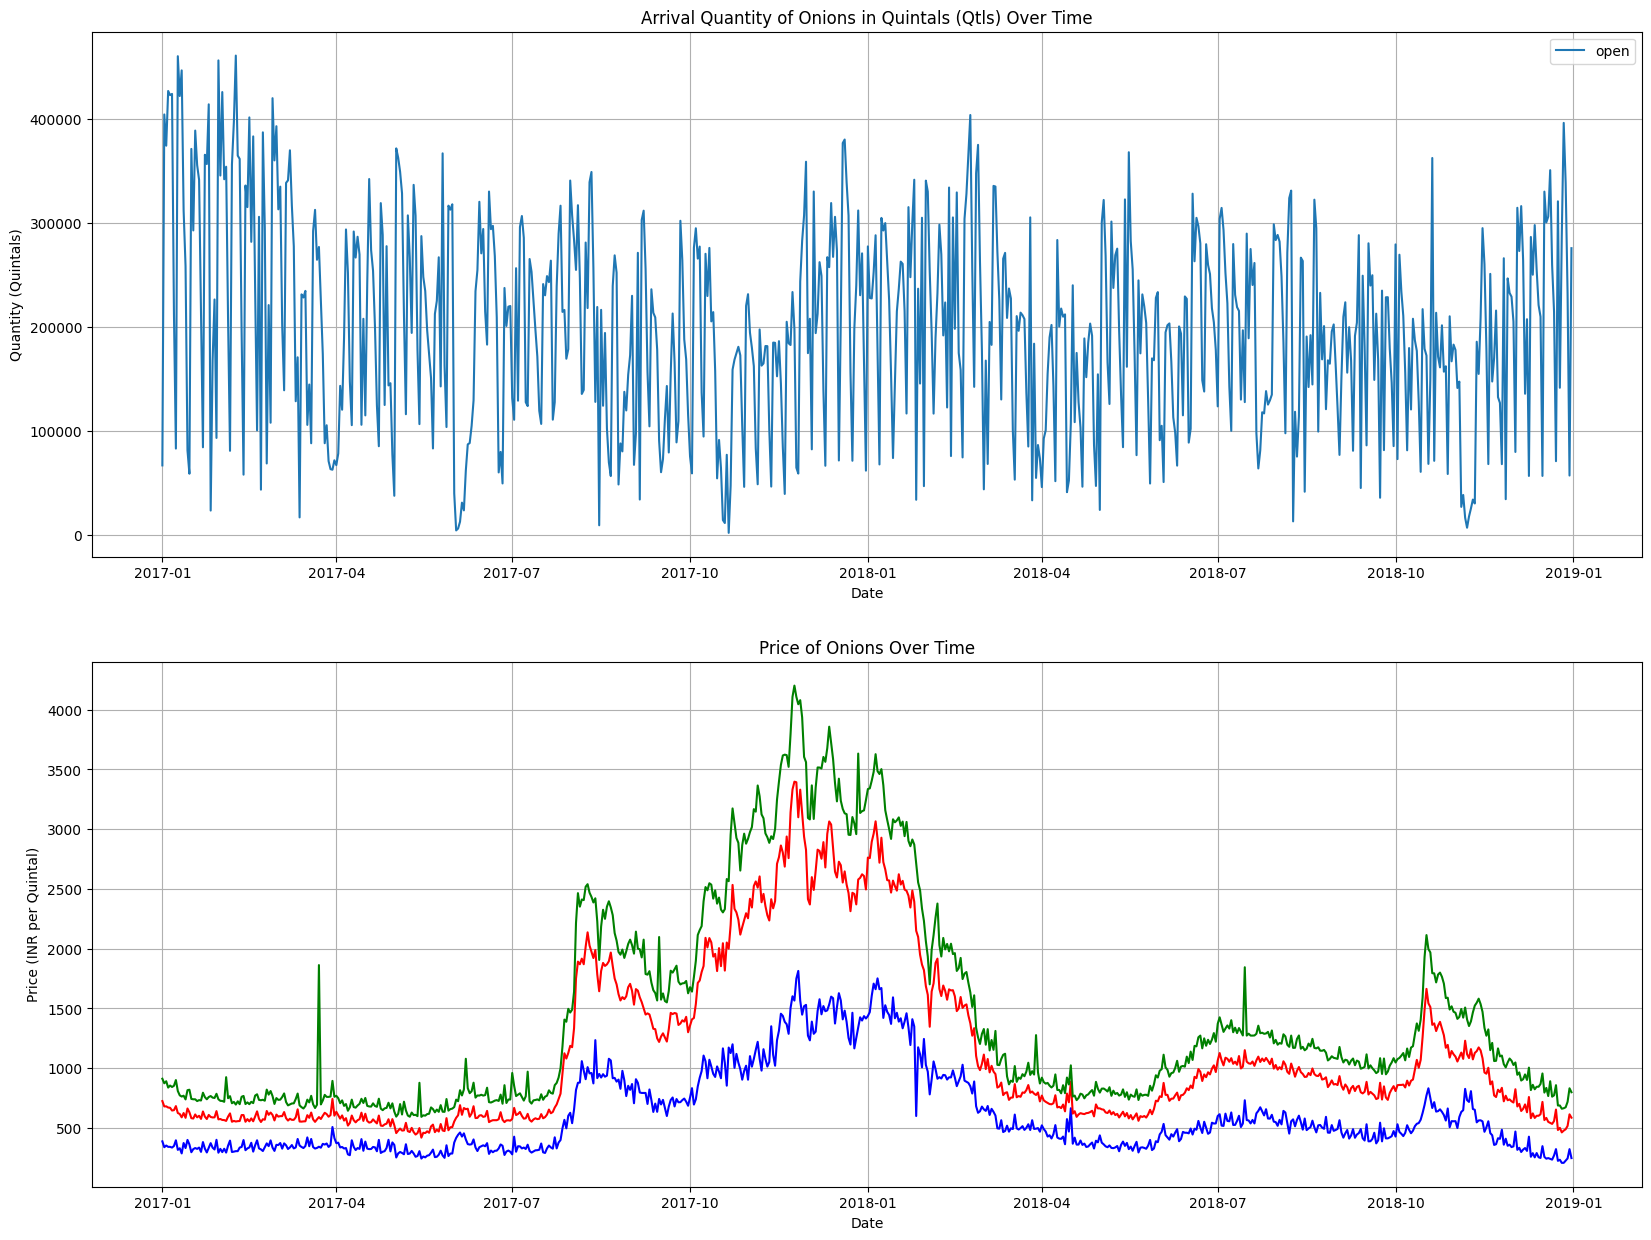

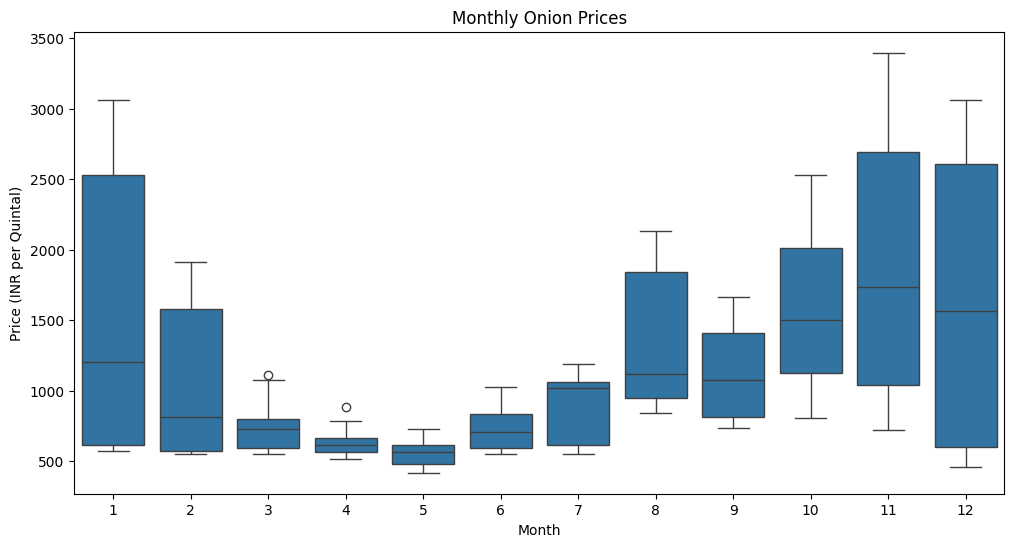

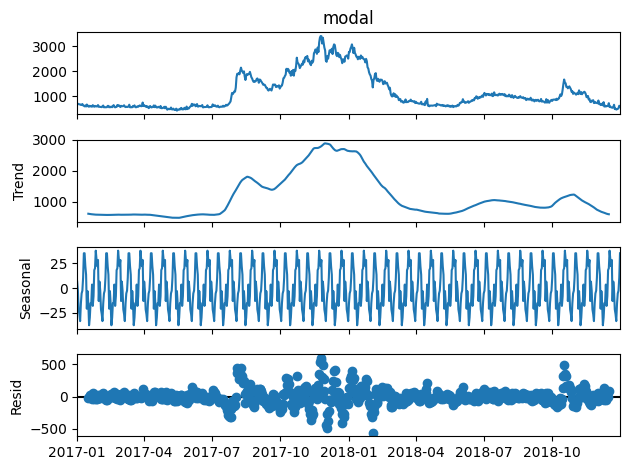

ADF Statistic: -1.6532236213877551
p-value: 0.4553597573973043


In [47]:
# Plotting Quantity
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['quantity'], label='open')
plt.title('Arrival Quantity of Onions in Quintals (Qtls) Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (Quintals)')
plt.legend()
plt.grid(True)

# Plotting min, max, and modal
plt.subplot(2, 1, 2)
plt.plot(df.index, df['min'], color='blue')
plt.plot(df.index, df['modal'], color='red')
plt.plot(df.index, df['max'], color='green')
plt.title('Price of Onions Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR per Quintal)')
plt.grid(True)

# Box plot to show modal price in each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='modal', data=df)
plt.xlabel('Month')
plt.ylabel('Price (INR per Quintal)')
plt.title('Monthly Onion Prices')

# Decomposition
result = seasonal_decompose(df['modal'], model='additive', period=30)
result.plot()
plt.show()

# Stationarity test
adf_test = adfuller(df['modal'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

plt.show()

# Analysis, Hypothesis Testing, & Machine Learning

# Insight & Policy Decision